# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key=weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
units='metric'
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + api_key + "&q=" + city+'&units='+units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aq qayeh
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | lerwick
Processing Record 4 of Set 1 | guanica
Processing Record 5 of Set 1 | san fernando de monte cristi
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | kaga bandoro
Processing Record 10 of Set 1 | jasper
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | suez
Processing Record 19 of Set 1 | danilovka
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,18.23,94,93,3.13,NZ,1705661516
1,lerwick,60.1545,-1.1494,3.00,94,100,1.31,GB,1705661371
2,guanica,17.9716,-66.9080,25.03,49,11,4.71,PR,1705661517
3,san fernando de monte cristi,19.8667,-71.6500,22.04,84,0,4.87,DO,1705661517
4,sur,22.5667,59.5289,25.56,59,12,4.38,OM,1705661518


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,18.23,94,93,3.13,NZ,1705661516
1,lerwick,60.1545,-1.1494,3.00,94,100,1.31,GB,1705661371
2,guanica,17.9716,-66.9080,25.03,49,11,4.71,PR,1705661517
3,san fernando de monte cristi,19.8667,-71.6500,22.04,84,0,4.87,DO,1705661517
4,sur,22.5667,59.5289,25.56,59,12,4.38,OM,1705661518


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

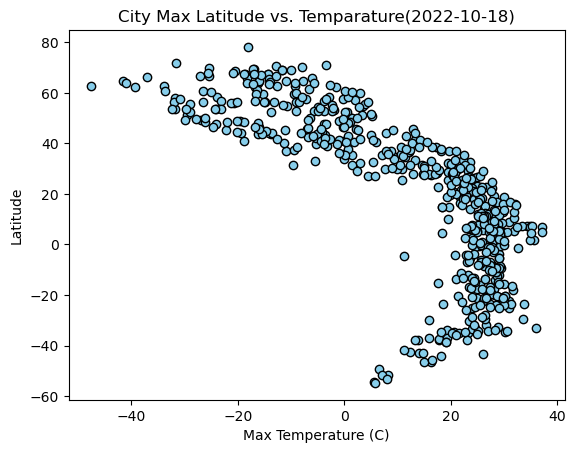

In [102]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Max Temp']
y_values=city_data_df['Lat']
plt.scatter(x_values,y_values,marker='o',facecolors='skyblue',edgecolors='black')
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temparature(2022-10-18)")
plt.xlabel("Max Temperature (C)")
plt.ylabel("Latitude")
#plt.show()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

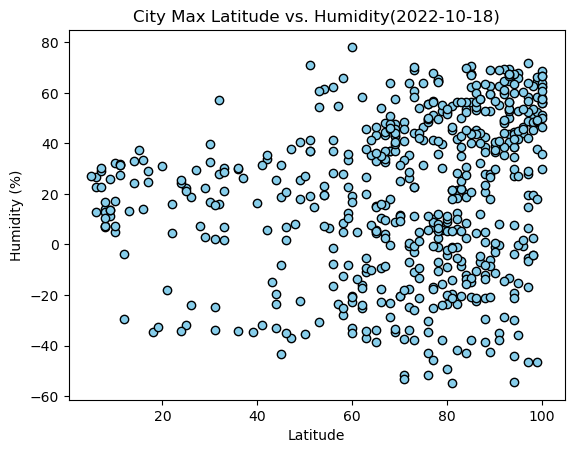

In [103]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df['Humidity']
y_values=city_data_df['Lat']
plt.scatter(x_values,y_values,marker='o',facecolors='skyblue',edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

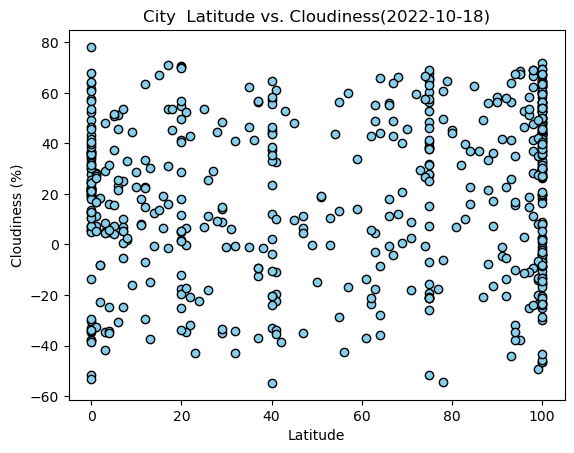

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Cloudiness']
y_values=city_data_df['Lat']
plt.scatter(x_values,y_values,marker='o',facecolors='skyblue',edgecolors='black')

# Incorporate the other graph properties
plt.title("City  Latitude vs. Cloudiness(2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

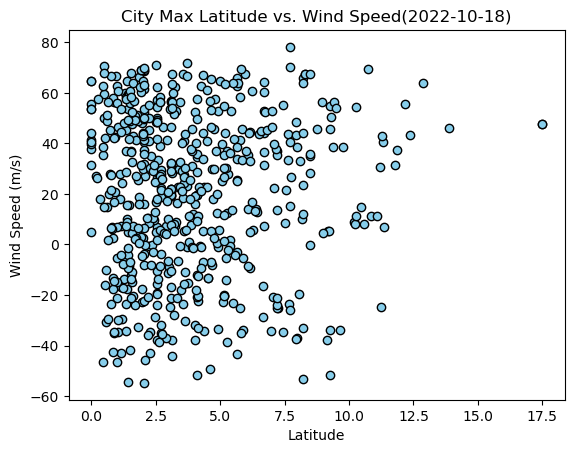

In [9]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Wind Speed']
y_values=city_data_df['Lat']
plt.scatter(x_values,y_values,marker='o',facecolors='skyblue',edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed(2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def len_regression(x,y,x1,x2,label1,label2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig1=plt.scatter(x,y)
    fig2=plt.plot(x,regress_values,"r-")
    fig3=plt.annotate(line_eq,(x1,x2),fontsize=15,color="red") 
    print(f'rvalue is:{rvalue}')
    plt.xlabel(label1)
    plt.ylabel(label2)
    return fig1
    return fig2
    return fig3
    
    
    
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'])>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lerwick,60.1545,-1.1494,3.00,94,100,1.31,GB,1705661371
2,guanica,17.9716,-66.9080,25.03,49,11,4.71,PR,1705661517
3,san fernando de monte cristi,19.8667,-71.6500,22.04,84,0,4.87,DO,1705661517
4,sur,22.5667,59.5289,25.56,59,12,4.38,OM,1705661518
7,kaga bandoro,6.9896,19.1874,37.18,8,0,2.55,CF,1705661520


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'])<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,18.23,94,93,3.13,NZ,1705661516
5,edinburgh of the seven seas,-37.0676,-12.3116,15.88,63,61,7.97,SH,1705661519
6,ambon,-3.6954,128.1814,29.08,12,40,2.06,ID,1705661519
9,grytviken,-54.2811,-36.5092,5.69,94,78,1.44,GS,1705661521
11,ushuaia,-54.8000,-68.3000,5.81,81,40,2.06,AR,1705661522


###  Temperature vs. Latitude Linear Regression Plot

rvalue is:-0.8756944530516526


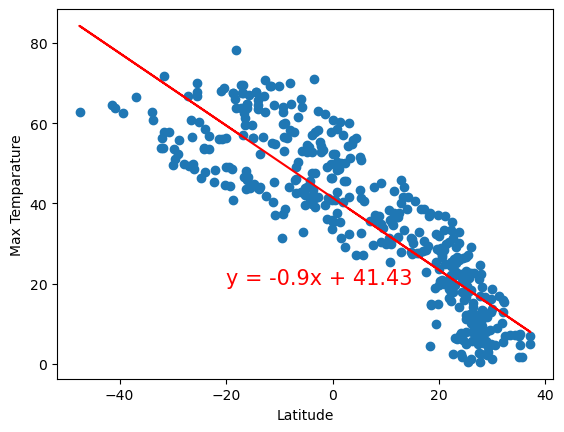

In [86]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df['Max Temp']
y=northern_hemi_df['Lat']
len_regression(x,y,-20,20,'Latitude','Max Temparature')




rvalue is:0.5880630561316179


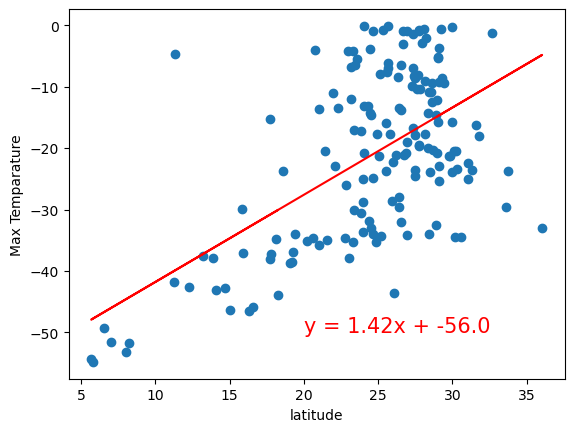

In [87]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Max Temp']
y=southern_hemi_df['Lat']
len_regression(x,y,20,-50,"latitude",'Max Temparature')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

rvalue is:0.42747674127627716


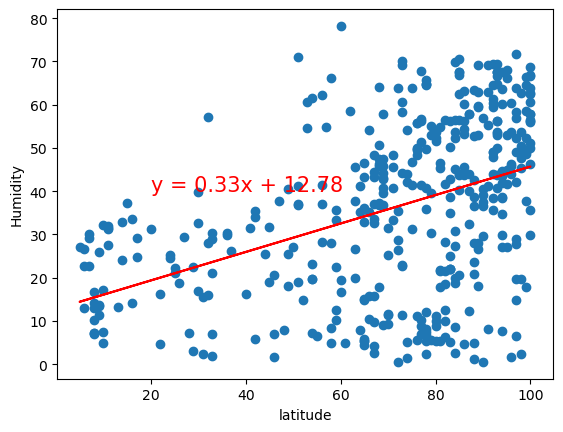

In [91]:
# Northern Hemisphere
x=northern_hemi_df['Humidity']
y=northern_hemi_df['Lat']
len_regression(x,y,20,40,"latitude",'Humidity')

rvalue is:0.17302934163185976


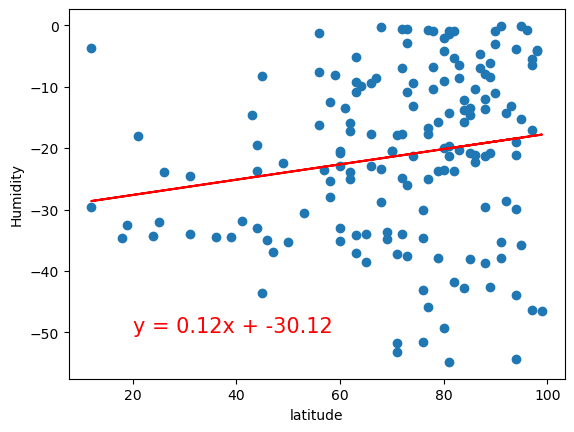

In [93]:
# Southern Hemisphere
x=southern_hemi_df['Humidity']
y=southern_hemi_df['Lat']
len_regression(x,y,20,-50,"latitude",'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

rvalue is:0.31300862809189417


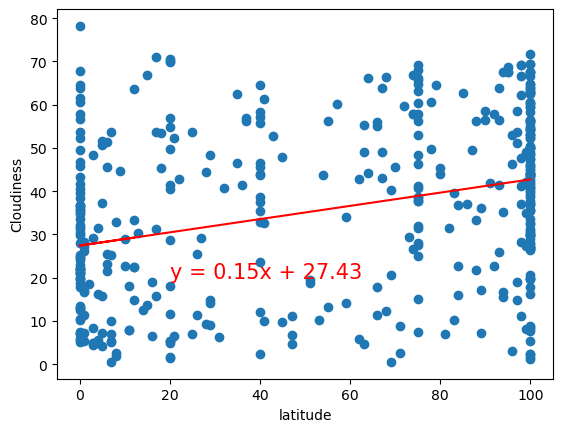

In [95]:
# Northern Hemisphere
x=northern_hemi_df['Cloudiness']
y=northern_hemi_df['Lat']
len_regression(x,y,20,20,"latitude",'Cloudiness')

rvalue is:0.22719273567302786


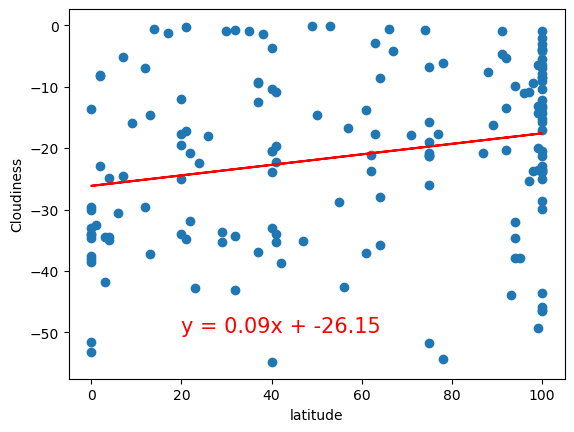

In [96]:
# Southern Hemisphere
x=southern_hemi_df['Cloudiness']
y=southern_hemi_df['Lat']
len_regression(x,y,20,-50,"latitude",'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

rvalue is:-0.0012146182811893964


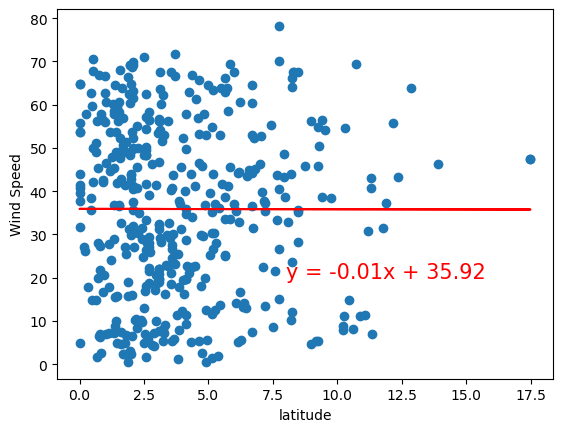

In [99]:
# Northern Hemisphere
x=northern_hemi_df['Wind Speed']
y=northern_hemi_df['Lat']
len_regression(x,y,8,20,"latitude",'Wind Speed')


rvalue is:-0.1137034656227454


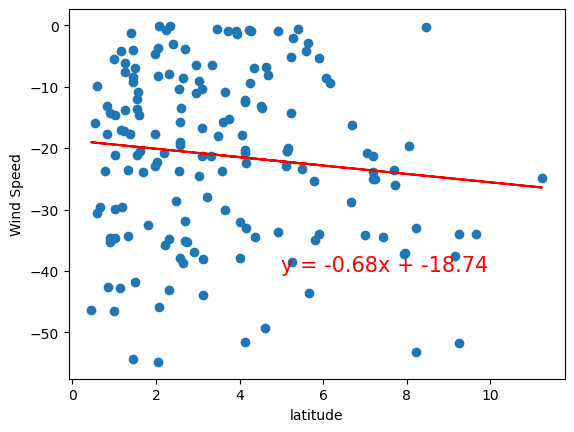

In [101]:
# Southern Hemisphere
x=southern_hemi_df['Wind Speed']
y=southern_hemi_df['Lat']
len_regression(x,y,5,-40,"latitude",'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE